In [81]:
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
#import imutils
import matplotlib.pyplot as plt

In [65]:
import tensorflow as tf
(x_trn, y_trn), (x_test, y_test) = tf.keras.datasets.mnist.load_data('/Users/rutujajadhav/mnist.npz')

3


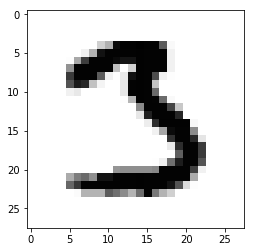

In [66]:
import matplotlib.pyplot as plt

image_index = 11111 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
img_rows=x_trn[0].shape[0]
img_cols=x_trn[1].shape[1]
plt.imshow(x_trn[image_index], cmap='Greys')

In [67]:
x_trn.shape

(60000, 28, 28)

In [68]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_trn = x_trn.reshape(x_trn.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_trn = x_trn.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_trn /= 255
x_test /= 255
print('x_trn shape:', x_trn.shape)
print('Number of images in x_trn', x_trn.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_trn shape: (60000, 28, 28, 1)
Number of images in x_trn 60000
Number of images in x_test 10000


In [69]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [70]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_trn,y=y_trn, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.2134 - acc: 0.9356
Epoch 2/10
60000/60000 [==============================] - 17s 278us/step - loss: 0.0854 - acc: 0.9739
Epoch 3/10
60000/60000 [==============================] - 17s 285us/step - loss: 0.0567 - acc: 0.9821
Epoch 4/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.0460 - acc: 0.9852
Epoch 5/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.0347 - acc: 0.9889
Epoch 6/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.0305 - acc: 0.9901
Epoch 7/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.0258 - acc: 0.9913
Epoch 8/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.0209 - acc: 0.9932
Epoch 9/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.0216 - acc: 0.9930
Epoch 10/10
60000/60000 [==============================] - 17s 286us/step - loss: 

In [71]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 102us/step


[0.06602216115339433, 0.9853]

3


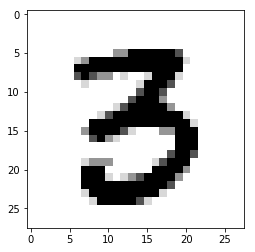

In [72]:
image_index = 5555
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')

prediction = model.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
print(prediction.argmax())